## Data Analysis on Electric Vehicle

#Import required libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data=pd.read_csv("/content/drive/MyDrive/dataset.csv")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data.head()

VIN (1-10)     County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel Vehicle Eligible              38   
2           Clean Alternative Fuel Vehicle Eligible              73   
3           Clean Alternative Fuel Vehicle Eligible             238   
4             Not eligible due to low battery range              26   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                   NaN       198968248   
1          0                   NaN         5204412   
2          0                  15.0       218972519   
3          0                  39.0       186750406   
4          0                  38.0         2006714   

              Vehicle Location        Electric Utility  2020 Census Tract  
0    POINT (-81.80023 24.5545)                     NaN        12087972100  
1  POINT (-114.57245 35.16815)                     NaN        32003005702  
2  POINT (-120.50721 46.60448)              PACIFICORP        53077001602  
3   POINT (-121.7515 48.53892)  PUGET SOUND ENERGY INC        53057951101  
4  POINT (-122.20596 47.97659)  PUGET SOUND ENERGY INC        53061041500

In [7]:
data.describe()

Postal Code     Model Year  Electric Range      Base MSRP  \
count  112634.000000  112634.000000   112634.000000  112634.000000   
mean    98156.226850    2019.003365       87.812987    1793.439681   
std      2648.733064       2.892364      102.334216   10783.753486   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2017.000000        0.000000       0.000000   
50%     98119.000000    2020.000000       32.000000       0.000000   
75%     98370.000000    2022.000000      208.000000       0.000000   
max     99701.000000    2023.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         112348.000000    1.126340e+05       1.126340e+05  
mean              29.805604    1.994567e+08       5.296650e+10  
std               14.700545    9.398427e+07       1.699104e+09  
min                1.000000    4.777000e+03       1.101001e+09  
25%               18.000000    1.484142e+08       5.303301e+10  
50%               34.000000    1.923896e+08       5.303303e+10  
75%               43.000000    2.191899e+08       5.305307e+10  
max               49.000000    4.792548e+08       5.603300e+10

In [8]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

In [9]:
data['Model'].fillna('Unknown', inplace=True)
data['Legislative District'].fillna('Unknown', inplace=True)
data['Vehicle Location'].fillna('Unknown', inplace=True)
data['Electric Utility'].fillna('Unknown', inplace=True)


<ipython-input-9-f214dfd65bc3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Model'].fillna('Unknown', inplace=True)
<ipython-input-9-f214dfd65bc3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [10]:
data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   VIN (1-10)                                         112634 non-null  object
 1   County                                             112634 non-null  object
 2   City                                               112634 non-null  object
 3   State                                              112634 non-null  object
 4   Postal Code                                        112634 non-null  int64 
 5   Model Year                                         112634 non-null  int64 
 6   Make                                               112634 non-null  object
 7   Model                                              112634 non-null  object
 8   Electric Vehicle Type                              112634 non-null  object
 9   Clea

In [13]:
unique_vins = data['VIN (1-10)'].nunique()
print(f"Number of unique VINs: {unique_vins}")


Number of unique VINs: 7548


In [14]:
# Check for duplicate VINs
duplicates = data[data['VIN (1-10)'].duplicated()]
print(f"Number of duplicate VINs: {len(duplicates)}")

# Optionally, print the duplicate rows
if len(duplicates) > 0:
    print(duplicates)

Number of duplicate VINs: 105086
        VIN (1-10)     County           City State  Postal Code  Model Year  \
16      1N4AZ0CP4D     Pierce       Kapowsin    WA        98344        2013   
29      1N4BZ0CP4H  Snohomish        Edmonds    WA        98020        2017   
46      1FADP5CU3D    Whitman        Pullman    WA        99163        2013   
51      5YJ3E1EA9L  Snohomish         Monroe    WA        98272        2020   
53      5YJ3E1EB3J     Kitsap        Keyport    WA        98345        2018   
...            ...        ...            ...   ...          ...         ...   
112629  7SAYGDEF2N       King         Duvall    WA        98019        2022   
112630  1N4BZ1CP7K   San Juan  Friday Harbor    WA        98250        2019   
112631  1FMCU0KZ4N       King         Vashon    WA        98070        2022   
112632  KNDCD3LD4J       King      Covington    WA        98042        2018   
112633  YV4BR0CL8N       King      Covington    WA        98042        2022   

          Make    

### Univariate Analysis

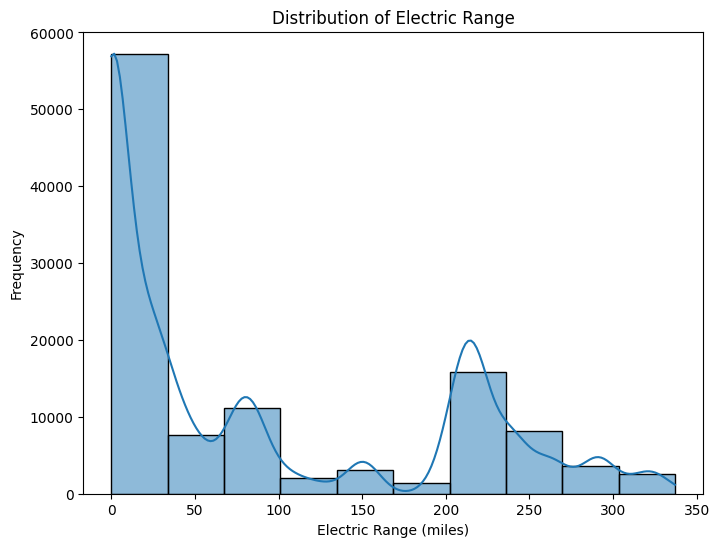

In [15]:
# Distribution of Electric Range
plt.figure(figsize=(8, 6))
sns.histplot(data['Electric Range'], bins=10, kde=True)
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.show()

Numerical Variables

In [16]:
# Summary for numerical columns
data[['Electric Range', 'Base MSRP', 'Model Year']].describe()

Electric Range      Base MSRP     Model Year
count   112634.000000  112634.000000  112634.000000
mean        87.812987    1793.439681    2019.003365
std        102.334216   10783.753486       2.892364
min          0.000000       0.000000    1997.000000
25%          0.000000       0.000000    2017.000000
50%         32.000000       0.000000    2020.000000
75%        208.000000       0.000000    2022.000000
max        337.000000  845000.000000    2023.000000

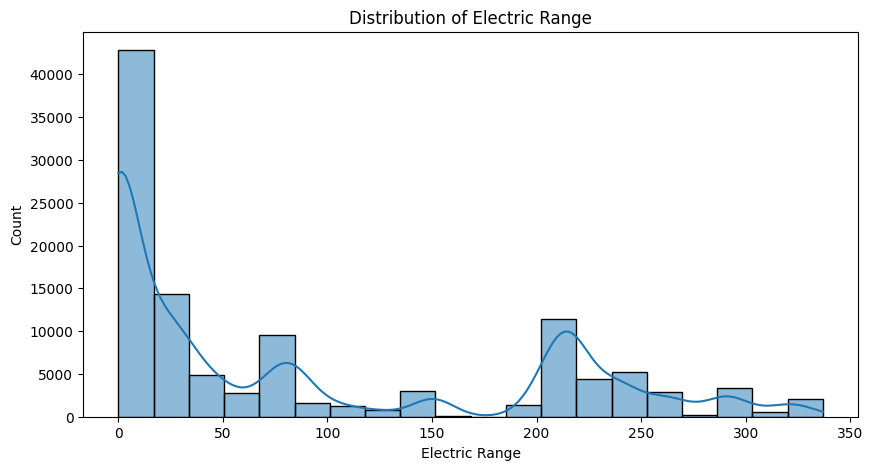

In [17]:
# Visualize Electric Range

plt.figure(figsize=(10,5))
sns.histplot(data['Electric Range'].dropna(), bins=20, kde=True)
plt.title('Distribution of Electric Range')
plt.show()


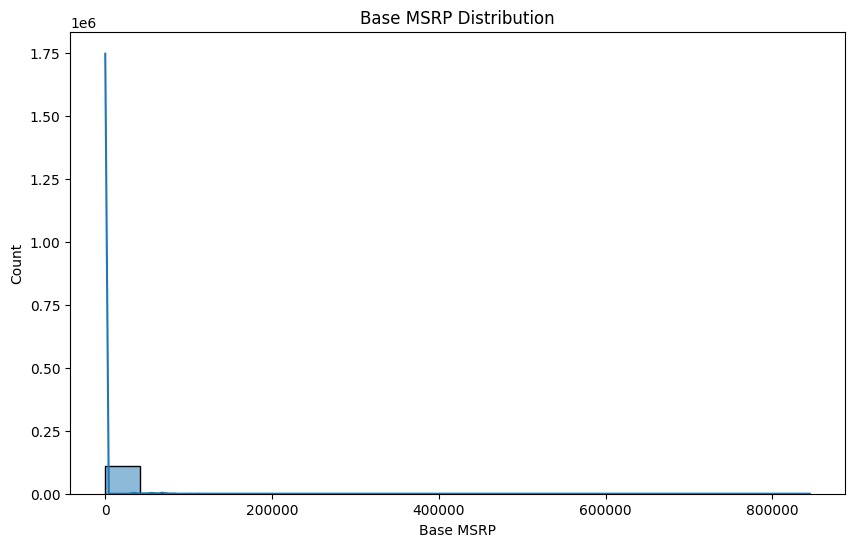

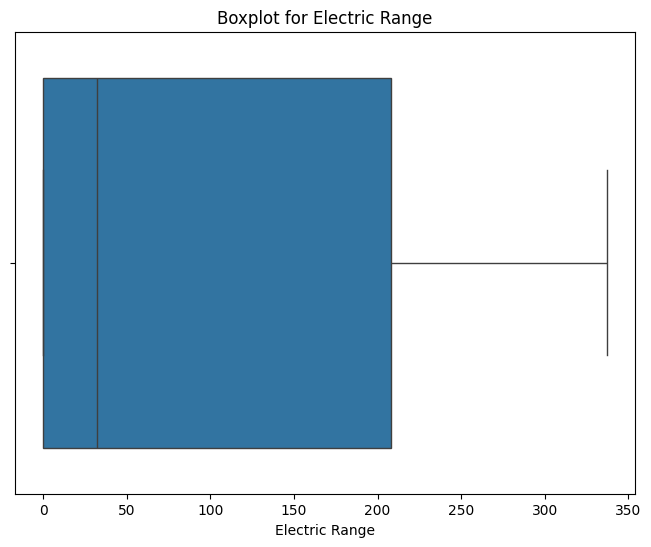

In [18]:

plt.figure(figsize=(10,6))
sns.histplot(data['Base MSRP'].dropna(), bins=20, kde=True)
plt.title('Base MSRP Distribution')
plt.show()

# Boxplot to detect outliers in Electric Range
plt.figure(figsize=(8,6))
sns.boxplot(x='Electric Range', data=data)
plt.title('Boxplot for Electric Range')
plt.show()


In [19]:
# Outlier detection using Z-scores
from scipy import stats
import numpy as np

data['electric_range_zscore'] = np.abs(stats.zscore(data['Electric Range'].dropna()))
outliers_electric_range = data[data['electric_range_zscore'] > 3]  # Z-score threshold of 3
print("Outliers in Electric Range:", outliers_electric_range[['Make', 'Model', 'Electric Range']])


Outliers in Electric Range: Empty DataFrame
Columns: [Make, Model, Electric Range]
Index: []


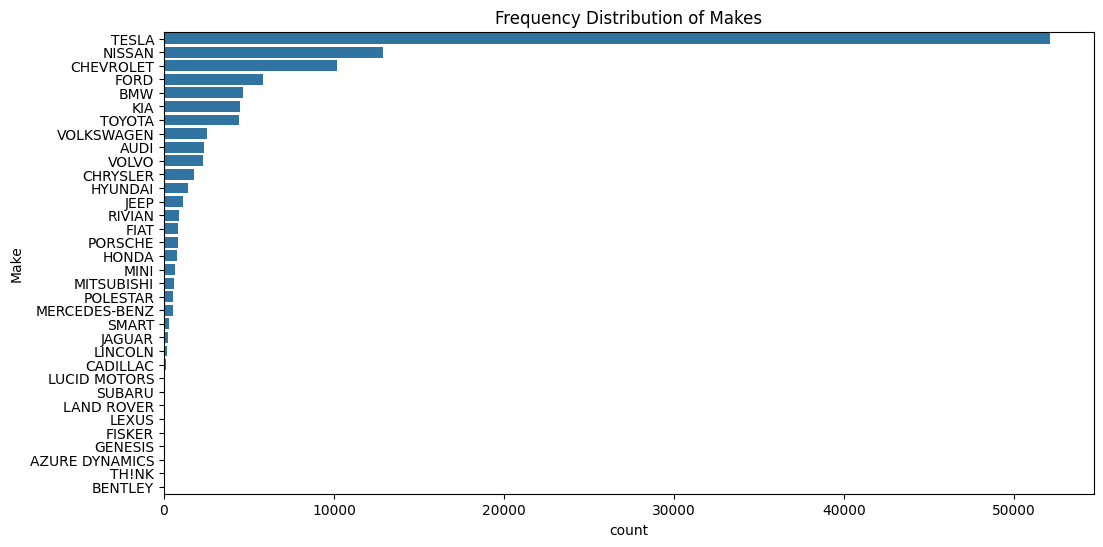

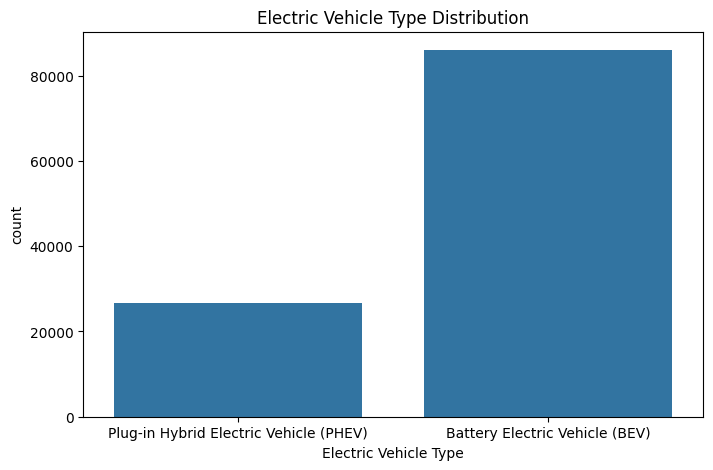

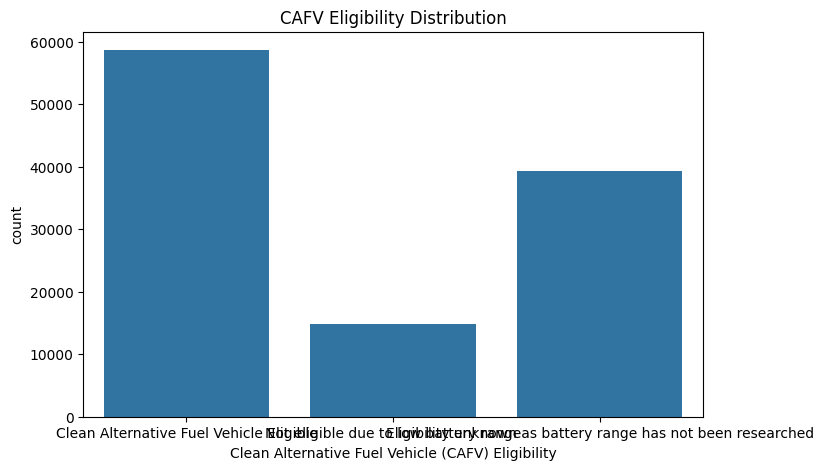

In [20]:
# Countplot for Categorical Variables
plt.figure(figsize=(12,6))
sns.countplot(y='Make', data=data, order=data['Make'].value_counts().index)
plt.title('Frequency Distribution of Makes')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='Electric Vehicle Type', data=data)
plt.title('Electric Vehicle Type Distribution')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', data=data)
plt.title('CAFV Eligibility Distribution')
plt.show()


## Bivariate Analysis

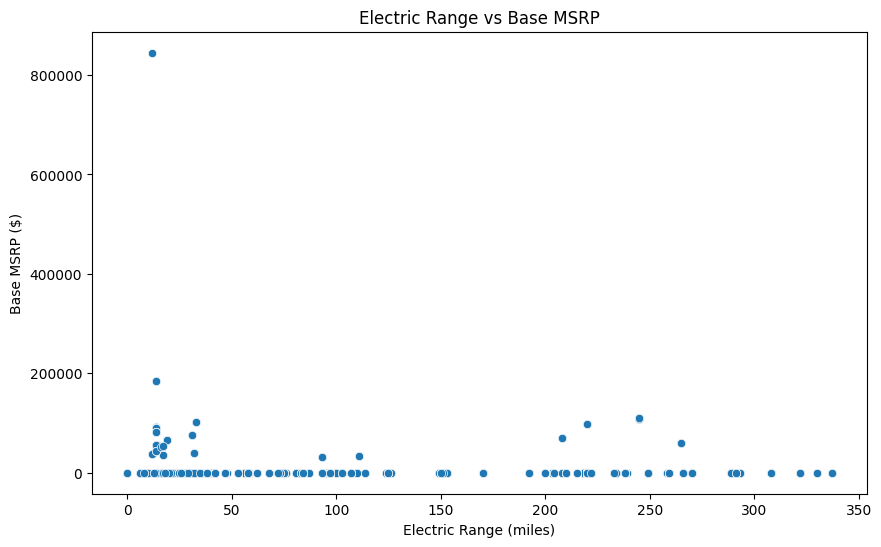

In [21]:
# Scatter plot between Electric Range and Base MSRP
plt.figure(figsize=(10,6))
sns.scatterplot(x='Electric Range', y='Base MSRP', data=data)
plt.title('Electric Range vs Base MSRP')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.show()


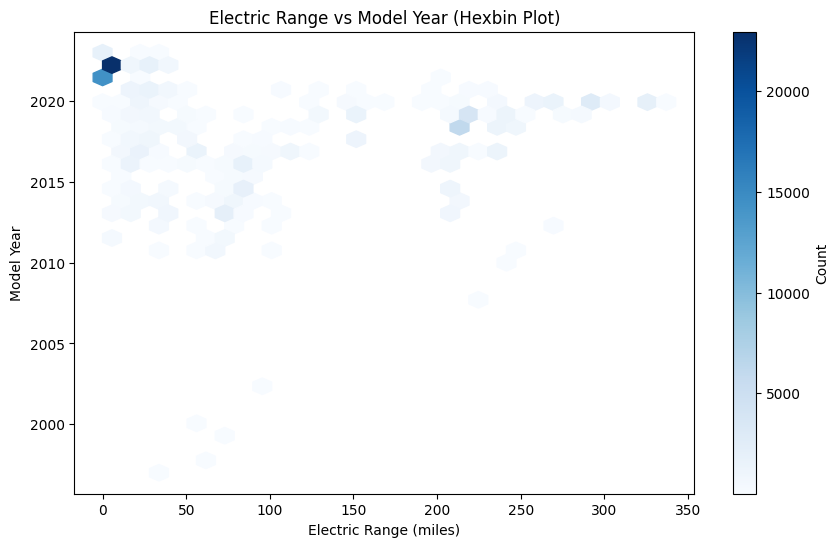

In [22]:
# Hexbin plot between Electric Range and Model Year
plt.figure(figsize=(10,6))
plt.hexbin(data['Electric Range'], data['Model Year'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count')
plt.title('Electric Range vs Model Year (Hexbin Plot)')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Model Year')
plt.show()


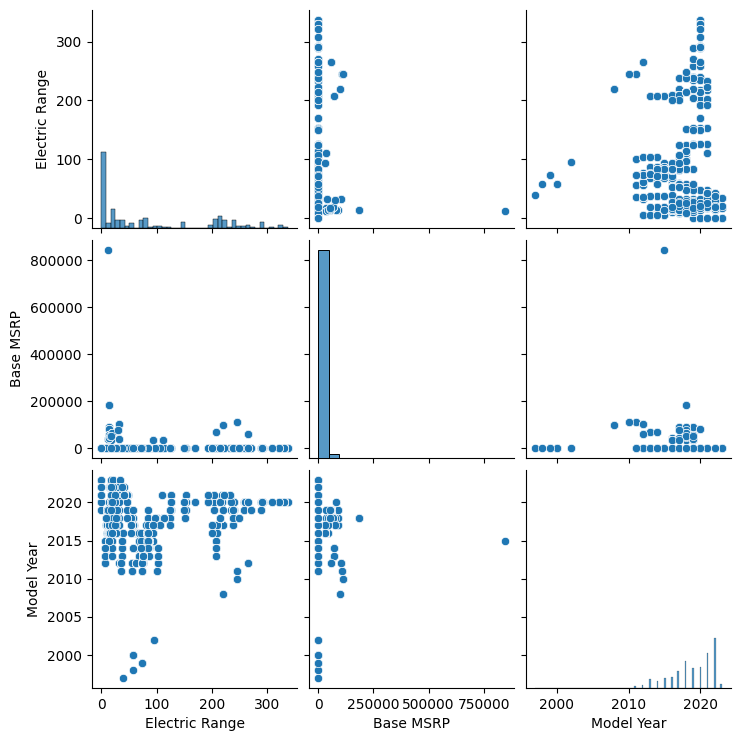

In [23]:
# Pair plot between Electric Range, Base MSRP, and Model Year
sns.pairplot(data[['Electric Range', 'Base MSRP', 'Model Year']].dropna())
plt.show()


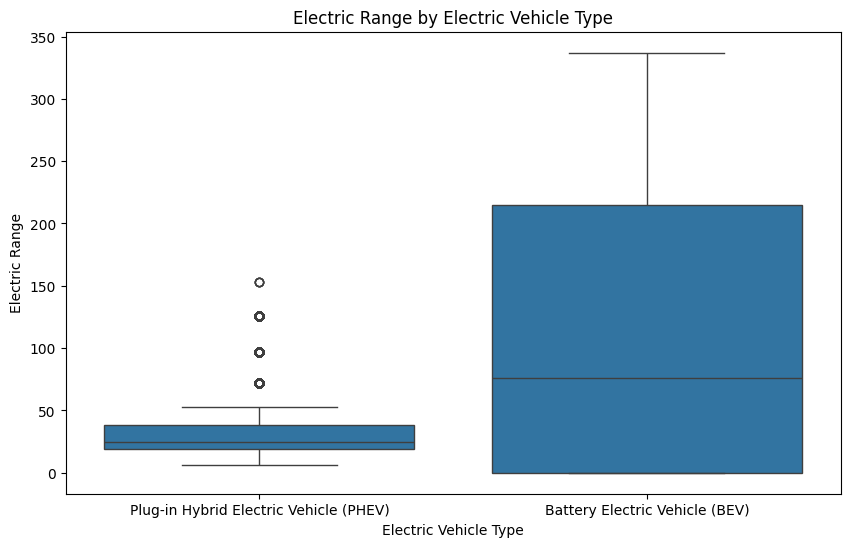

In [24]:
# Boxplot for Electric Range across different Electric Vehicle Types
plt.figure(figsize=(10,6))
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=data)
plt.title('Electric Range by Electric Vehicle Type')
plt.show()


<ipython-input-25-78eb8d975f7d>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Electric Vehicle Type', y='Base MSRP', data=data, ci=None)


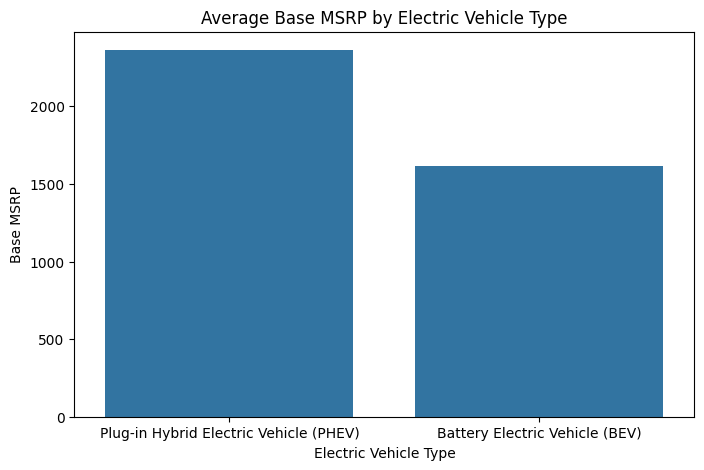

In [25]:
# Bar plot for Base MSRP by Electric Vehicle Type

plt.figure(figsize=(8,5))
sns.barplot(x='Electric Vehicle Type', y='Base MSRP', data=data, ci=None)
plt.title('Average Base MSRP by Electric Vehicle Type')
plt.show()


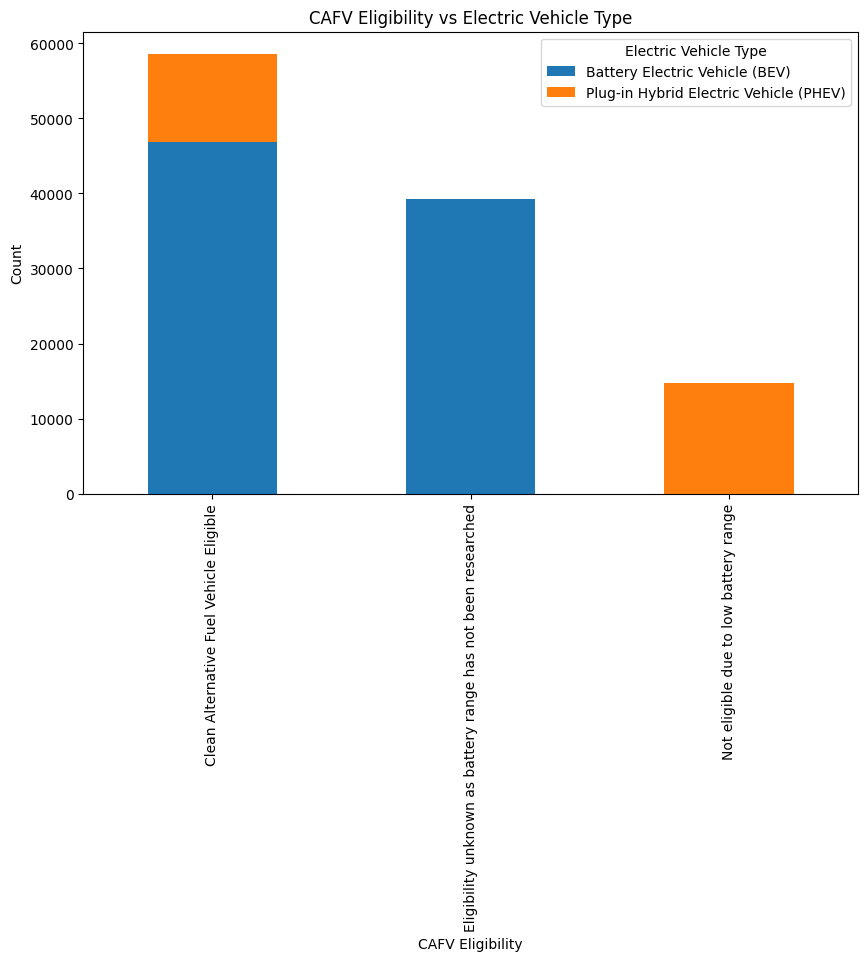

In [26]:
# Cross tabulation between CAFV Eligibility and Electric Vehicle Type
ct = pd.crosstab(data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'], data['Electric Vehicle Type'])

# Stacked bar plot
ct.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('CAFV Eligibility vs Electric Vehicle Type')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Count')
plt.show()


                Electric Range  Base MSRP  Model Year
Electric Range        1.000000   0.085025   -0.288433
Base MSRP             0.085025   1.000000   -0.229130
Model Year           -0.288433  -0.229130    1.000000


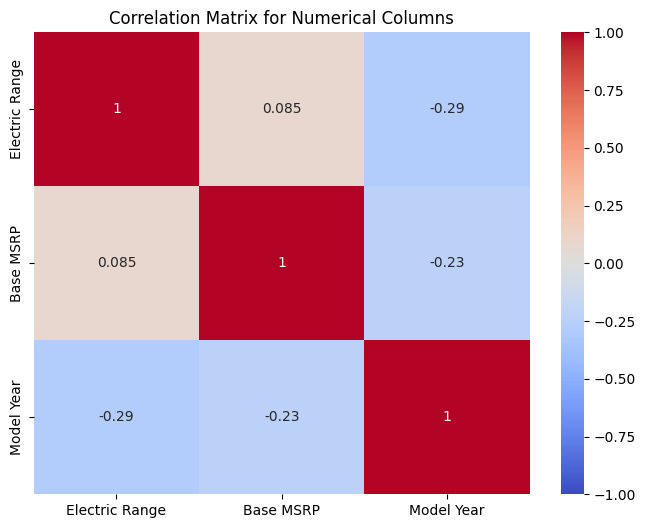

In [27]:


numerical_columns = ['Electric Range', 'Base MSRP', 'Model Year']
correlation_matrix = data[numerical_columns].corr()
print(correlation_matrix)
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Columns')
plt.show()


# Plotly

Scatter plot

In [28]:
import plotly.express as px

fig = px.scatter(data,
                 x='Electric Range',
                 y='Base MSRP',
                 color='Make',  # Color points by car make
                 size='Electric Range',  # Bubble size based on Electric Range
                 title='Electric Range vs Base MSRP',
                 hover_data=['Model'])  # Show car model on hover

fig.show()


Box plot

In [29]:

fig = px.box(data,
             x='Make',
             y='Electric Range',
             color='Make',  # Different colors for each Make
             title='Box Plot of Electric Range by Make')

fig.show()


Pie chart

In [30]:
fig = px.pie(data,
             names='Electric Vehicle Type',
             title='Distribution of Electric Vehicle Types',
             hole=0.4,
             color_discrete_sequence=px.colors.sequential.Viridis)

fig.show()


# **Choropleth**

In [31]:
import plotly.express as px


ev_count_by_state = data.groupby('State').size().reset_index(name='EV Count')

# Step 2: Create the Choropleth map
fig = px.choropleth(
    ev_count_by_state,
    locations='State',
    locationmode='USA-states',
    color='EV Count',
    color_continuous_scale='Viridis',
    scope="usa",
    labels={'EV Count': 'Number of EVs'},  # Label for the color bar
    title='Number of Electric Vehicles by State'
)


fig.update_layout(geo=dict(
    lakecolor='rgb(255, 255, 255)'
))

# Step 4: Show the plot
fig.show()


In [32]:

fig.update_layout(geo=dict(
    lakecolor='rgb(255, 255, 255)'
))


fig.show()

# **Bar chart race**

In [33]:
count_df = data.groupby(['Model Year', 'Make']).size().reset_index(name='Count')

In [35]:
!pip install bar_chart_race

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 12.9 MB/s eta 0:00:00


In [37]:
import bar_chart_race as bcr


In [38]:
df = pd.DataFrame(data)

grouped_df = df.groupby(['Model Year', 'Make']).size().unstack(fill_value=0)

grouped_df = grouped_df.reindex(range(grouped_df.index.min(), grouped_df.index.max() + 1), fill_value=0)

In [39]:

color_map = plt.get_cmap('tab20', len(grouped_df.columns))

In [40]:
bcr.bar_chart_race(
    df=grouped_df,
    filename="final.mp4",
    figsize=(26, 15),
    dpi=120,
    orientation="h",
    sort="desc",  # Sort bars in descending order
    n_bars=10,
    steps_per_period=45,
    period_length=3000,
    cmap=color_map,
    title={
        'label': 'Year-wise Sales of Electric Vehicles by Make',
        'size': 52,
        'weight': 'bold',
        'pad': 40
    },
    period_label={
        'x': .95, 'y': .15,
        'ha': 'right',
        'va': 'center',
        'size': 72,
        'weight': 'semibold'
    },
    bar_label_size=27,
    tick_label_size=27,
    bar_kwargs={'alpha': .99, 'lw': 0},
    period_fmt='{x:.0f}',
)

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:333: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.

